Dataset shape: (569, 30)
Class distribution: [212 357]


C:\Users\akshith\AppData\Local\Temp\ipykernel_21140\3687476036.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="Set2")


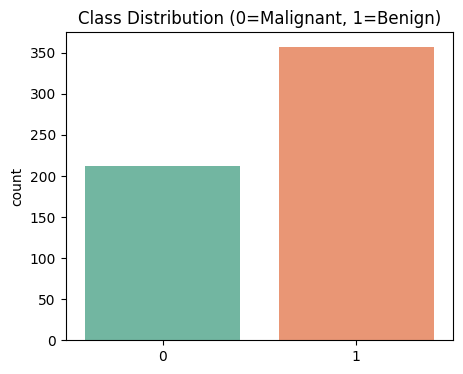

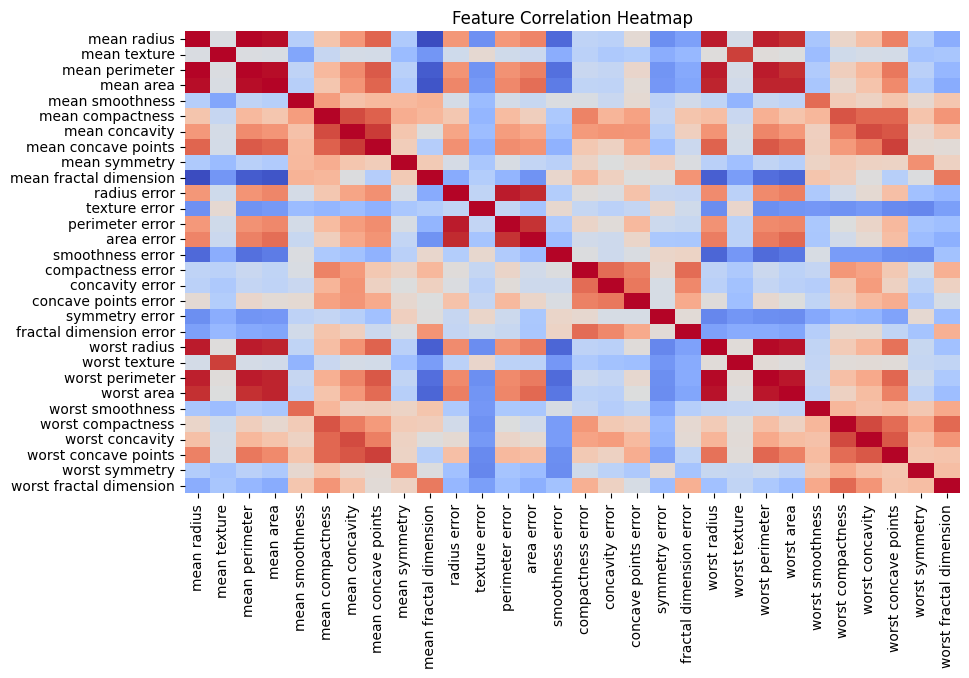

c:\Users\akshith\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:55:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\akshith\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:56:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\akshith\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:56:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\akshith\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:56:18] WARNING: 


📊 5-Fold Cross Validation Results:
    Decision Tree  AdaBoost  Gradient Boosting   XGBoost  Random Forest  \
0       0.947368  0.973684           0.956140  0.964912       0.964912   
1       0.956140  0.982456           0.982456  0.982456       0.982456   
2       0.929825  0.956140           0.956140  0.956140       0.947368   
3       0.947368  0.991228           0.991228  0.982456       0.964912   
4       0.946903  0.964602           0.955752  0.955752       0.946903   

   Stacked Ensemble  
0          0.964912  
1          0.991228  
2          0.964912  
3          0.973684  
4          0.955752  

Average Accuracies:
 Decision Tree        0.945521
AdaBoost             0.973622
Gradient Boosting    0.968343
XGBoost              0.968343
Random Forest        0.961310
Stacked Ensemble     0.970098
dtype: float64


c:\Users\akshith\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:56:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


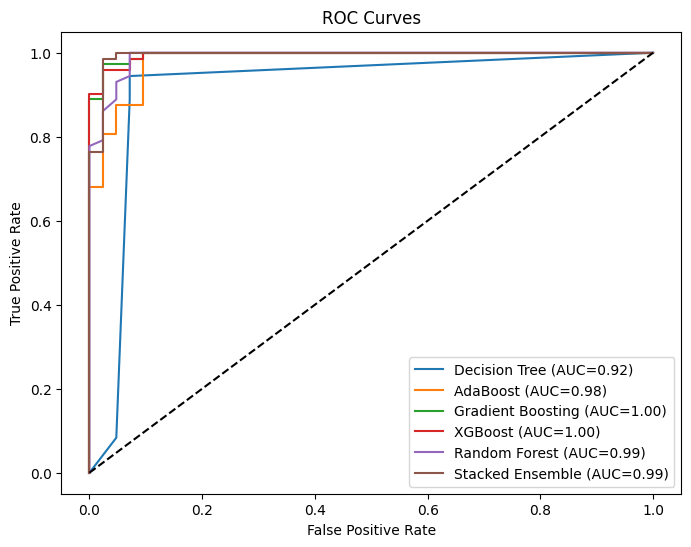

In [5]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, auc

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb


# 1. Load and Preprocess Dataset


data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target  # 0 = malignant, 1 = benign

print("Dataset shape:", X.shape)
print("Class distribution:", np.bincount(y))

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


# 2. EDA


plt.figure(figsize=(5,4))
sns.countplot(x=y, palette="Set2")
plt.title("Class Distribution (0=Malignant, 1=Benign)")
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(pd.DataFrame(X_scaled, columns=data.feature_names).corr(), cmap="coolwarm", cbar=False)
plt.title("Feature Correlation Heatmap")
plt.show()


# 3. Models & Hyperparameter Tuning


results = {}

# --- Decision Tree ---
dt_params = {"criterion":["gini","entropy"], "max_depth":[3,5,7,None],
             "min_samples_split":[2,5,10], "min_samples_leaf":[1,2,4]}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring="accuracy", n_jobs=-1)
dt_grid.fit(X_train, y_train)
results["Decision Tree"] = (dt_grid.best_params_, dt_grid.best_score_)


# --- AdaBoost ---
ab_params = {"n_estimators":[50,100,200], "learning_rate":[0.01,0.1,1]}
ab_grid = GridSearchCV(
    AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1)),
    ab_params,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)
ab_grid.fit(X_train, y_train)
results["AdaBoost"] = (ab_grid.best_params_, ab_grid.best_score_)

# --- Gradient Boosting ---
gb_params = {"n_estimators":[50,100,200], "learning_rate":[0.01,0.1,0.2], "max_depth":[3,5]}
gb_grid = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_params, cv=5, scoring="accuracy", n_jobs=-1)
gb_grid.fit(X_train, y_train)
results["Gradient Boosting"] = (gb_grid.best_params_, gb_grid.best_score_)

# --- XGBoost ---
xgb_params = {"n_estimators":[50,100,200], "learning_rate":[0.01,0.1,0.2], "max_depth":[3,5], "gamma":[0,1], "subsample":[0.8,1.0]}
xgb_grid = GridSearchCV(xgb.XGBClassifier(eval_metric="logloss", use_label_encoder=False), xgb_params, cv=5, scoring="accuracy", n_jobs=-1)
xgb_grid.fit(X_train, y_train)
results["XGBoost"] = (xgb_grid.best_params_, xgb_grid.best_score_)

# --- Random Forest ---
rf_params = {"n_estimators":[50,100,200], "max_depth":[None,5,10], "criterion":["gini","entropy"], "max_features":["sqrt","log2"]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring="accuracy", n_jobs=-1)
rf_grid.fit(X_train, y_train)
results["Random Forest"] = (rf_grid.best_params_, rf_grid.best_score_)

# --- Stacked Ensemble ---
base_learners = [
    ("svm", SVC(probability=True, kernel="linear")),
    ("nb", GaussianNB()),
    ("dt", DecisionTreeClassifier(max_depth=5))
]
final_estimators = {
    "LogReg": LogisticRegression(),
    "RandomForest": RandomForestClassifier(n_estimators=100)
}

stack_results = {}
for name, final_est in final_estimators.items():
    stack = StackingClassifier(estimators=base_learners, final_estimator=final_est, cv=5)
    scores = cross_val_score(stack, X_scaled, y, cv=5, scoring="accuracy")
    stack_results[name] = (scores.mean(), scores.std())

results["Stacked Ensemble"] = stack_results


# 4. 5-Fold Cross-Validation for All Models


cv = KFold(n_splits=5, shuffle=True, random_state=42)
models = {
    "Decision Tree": dt_grid.best_estimator_,
    "AdaBoost": ab_grid.best_estimator_,
    "Gradient Boosting": gb_grid.best_estimator_,
    "XGBoost": xgb_grid.best_estimator_,
    "Random Forest": rf_grid.best_estimator_,
    "Stacked Ensemble": StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression(), cv=5)
}

cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=cv, scoring="accuracy")
    cv_results[name] = scores

cv_df = pd.DataFrame(cv_results)
print("\n📊 5-Fold Cross Validation Results:\n", cv_df)
print("\nAverage Accuracies:\n", cv_df.mean())


# 5. ROC Curve Plot


plt.figure(figsize=(8,6))
for name, model in models.items():
    model.fit(X_train, y_train)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:,1]
    else:
        y_prob = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc(fpr,tpr):.2f})")

plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()
